Accuracy of Decision Tree Classifier: 1.0


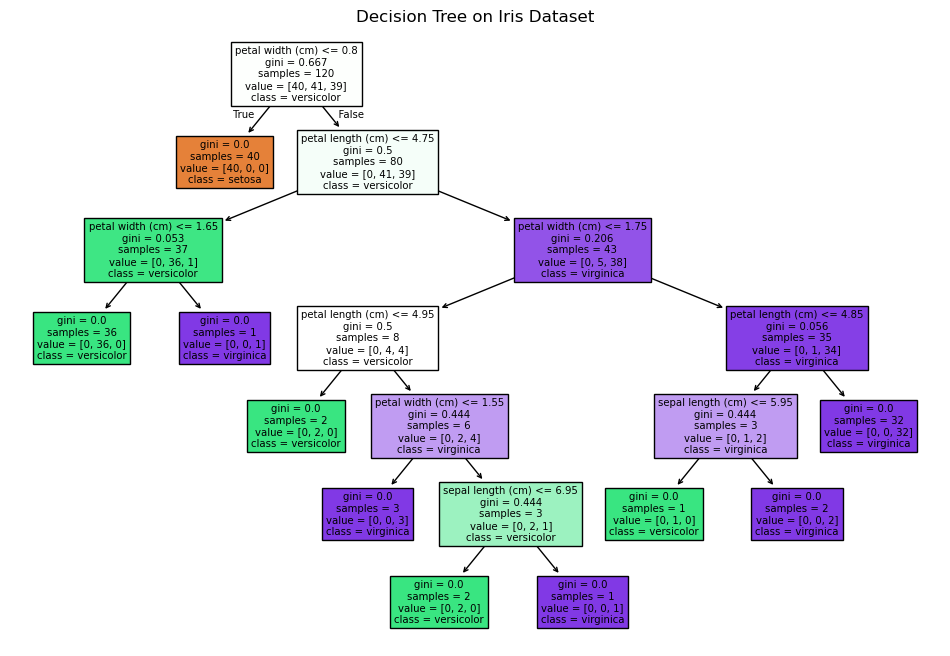

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the accuracy of the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of Decision Tree Classifier: {accuracy}')

# plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title('Decision Tree on Iris Dataset')
plt.show()

In [8]:
'''
1. Write a program to predict heart disease (the target variable) based
on various health indicators using Logistic Regression Technique and evaluate its performance. 
Given a data set of 305 items.
data set - heart.csv

Note: The original problem asked for biking/smoking variables which don't exist in this dataset.
This has been adapted to work with the actual heart disease dataset available.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load dataset
data = pd.read_csv('heart.csv')

# Display dataset info
print("Dataset shape:", data.shape)
print("\nDataset columns:", data.columns.tolist())
print("\nFirst few rows:")
print(data.head())

# Use multiple features for prediction (selecting relevant numerical features)
# age, sex, cp (chest pain), trestbps (blood pressure), chol (cholesterol), etc.
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']  # target: 1 = heart disease, 0 = no heart disease

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model (better for binary classification)
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Performance:')
print(f'Accuracy: {accuracy:.4f}')
print(f'\nClassification Report:')
print(classification_report(y_test, y_pred))
print(f'\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importance (coefficients for logistic regression)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
coefficients = model.coef_[0]
print(f'\nFeature Importance (Coefficients):')
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef:.4f}')

Dataset shape: (303, 14)

Dataset columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Model Performance:
Accuracy: 0.8852

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88     

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
'''
2. Write a program to predict medical expenses (the dependent variable) based on the independent
variables, age, sex, bmi, children, smoker and region using Multiple Linear Regression
Technique and evaluate its performance. Given a data set of 1338 items.
data set - insurance.csv
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load dataset
data = pd.read_csv('insurance.csv')


# Create a copy for preprocessing
data_processed = data.copy()

# Encode categorical variables
# For 'sex': female = 0, male = 1
data_processed['sex'] = data_processed['sex'].map({'female': 0, 'male': 1})

# For 'smoker': no = 0, yes = 1  
data_processed['smoker'] = data_processed['smoker'].map({'no': 0, 'yes': 1})

# For 'region': use Label Encoding
le_region = LabelEncoder()
data_processed['region'] = le_region.fit_transform(data_processed['region'])

print("\nAfter encoding categorical variables:")
print(data_processed.head())

# Prepare features and target
X = data_processed[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data_processed['expenses']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Feature importance (coefficients)
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
coefficients = model.coef_
intercept = model.intercept_

print(f'\nModel Coefficients:')
print(f'Intercept: {intercept:.2f}')
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef:.2f}')


After encoding categorical variables:
   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86

Feature matrix shape: (1338, 6)
Target vector shape: (1338,)

Model Coefficients:
Intercept: -11951.68
age: 257.04
sex: -18.70
bmi: 335.94
children: 425.46
smoker: 23646.93
region: -271.22
